**1. Setting Up Kaggle API**
Make sure you've uploaded your kaggle.json file to Colab and have run the necessary commands to locate it correctly. If not, follow the instructions provided earlier to upload and set up your Kaggle API key.

**2. Download Titanic Dataset**
The following code will download the Titanic dataset from Kaggle directly into your Colab environment:

**# Install Kaggle library**

!pip install kaggle

**# Make .kaggle directory**

!mkdir ~/.kaggle

**# Copy the kaggle.json file into this directory**

!cp kaggle.json ~/.kaggle/

**# Permission for the json to act**

!chmod 600 ~/.kaggle/kaggle.json

**# Download the Titanic dataset**

!kaggle competitions download -c titanic

**# Unzip the downloaded files**

!unzip titanic.zip

In [ ]:
!pip install ipywidgets

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 67 bytes


**Create the .kaggle Directory and Move the File**

In [9]:
# Make sure to import os if you haven't already
import os

# Create the .kaggle directory if it doesn't already exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the kaggle.json into this directory
!mv kaggle.json /root/.kaggle/

# Change the permissions of the file
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pip install kaggle


**Titanic Survival Predictions**

**Step 1: Understand the Problem**

Objective: Predict if a passenger survived the Titanic shipwreck.

Input: Passenger data (e.g., name, age, gender, socio-economic class, etc.).

Output: A prediction (survived or not).



In [11]:
# Download the Titanic dataset
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 49.0MB/s]


In [12]:
# Unzip the downloaded files
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**3. Load and Explore the Dataset**

Now, let's load the dataset into a Pandas DataFrame and take a look at the first few rows of the training data:

In [21]:
import pandas as pd

# Load the training data
train_data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**4. Initial Data Exploration**

Here are some basic commands to start exploring the dataset. This will help you understand the structure of your data, identify missing values, and formulate initial hypotheses:

In [22]:
# Basic information about the dataset
train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# Summary statistics for numeric columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Count of missing values in each column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# Distribution of the target variable
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

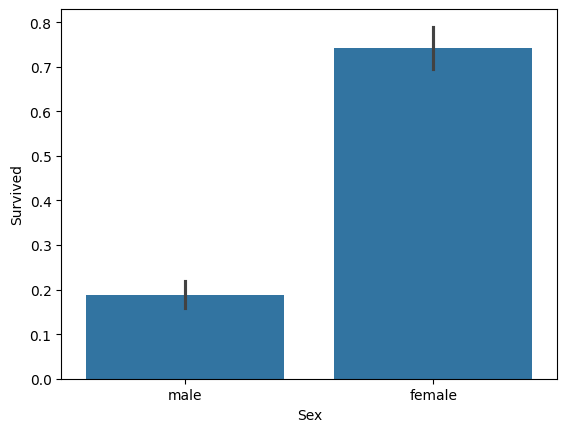

In [19]:
# Explore a few variables visually
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.show()

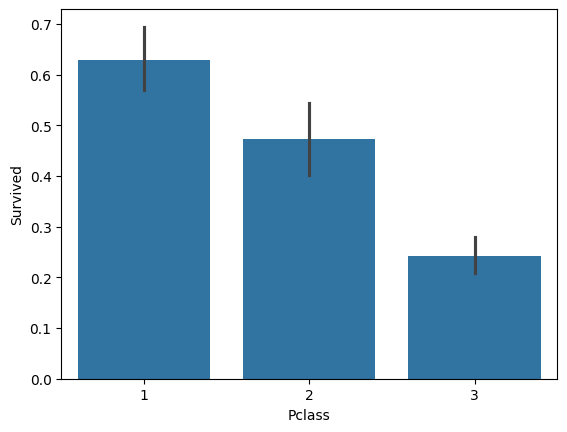

In [20]:

# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()

**Step 2: Data Preprocessing and Feature Engineering**

**2.1 Handling Missing Values**

Missing data can significantly impact the performance of machine learning models. Let's address missing values in the Titanic dataset, focusing on common strategies like imputation.

Age: We'll fill missing values with the median age, as age distribution might be skewed.

Cabin: Due to a high percentage of missing values, we might drop this column or create a new feature indicating whether the cabin information was missing.

Embarked: We'll fill missing values with the mode (the most frequent port of embarkation).

In [ ]:
import numpy as np

# Fill missing 'Age' values with median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Option 1: Drop the 'Cabin' column (uncomment to use)
#train_data.drop('Cabin', axis=1, inplace=True)

# Option 2: Create a new feature indicating whether Cabin data was missing
train_data['Cabin_ind'] = np.where(train_data['Cabin'].isnull(), 0, 1)

# Fill missing 'Embarked' values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

train_data.head()


**2.2 Feature Engineering**

Feature engineering involves creating new features from existing data to better capture the underlying patterns in the data.

Family Size: We can combine SibSp (siblings/spouse aboard) and Parch (parents/children aboard) to create a new feature that represents the total family size of a passenger.

IsAlone: Based on family size, we can create another feature indicating whether a passenger was alone.

In [28]:
# Create a new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Create another feature 'IsAlone'
train_data['IsAlone'] = np.where(train_data['FamilySize'] > 1, 0, 1)


**2.3 Encoding Categorical Variables**

Machine learning models require numerical input, so we need to convert categorical variables into a format that can be provided to a model. We'll focus on one-hot encoding, which converts categorical variables into a form that could be provided to ML algorithms to do a better job in prediction.

Sex and Embarked are two categorical features we'll encode.


In [29]:
# One-hot encode 'Sex' and 'Embarked' columns
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])


**2.4 Drop Unnecessary Columns**

Finally, we'll drop columns that won't be used as features for our model.


In [30]:
# Drop columns that won't be used as features
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


**Step 3: Model Selection and Training**

After preprocessing, we select a model to train on our data. For simplicity, we'll start with Logistic Regression, a good baseline for binary classification problems.

**3.1 Splitting the Data**

Before training, we split our training data into a training set and a validation set to evaluate our model's performance.

In [31]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


**3.2 Training the Model**

In [41]:
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
model = LogisticRegression(max_iter=2000)  # Increase max_iter if needed for convergence

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")


Validation Accuracy: 0.8044692737430168


**Step 4: Model Evaluation**

After training your model, it's crucial to evaluate its performance to understand how well it might perform on unseen data. For classification problems like the Titanic survival prediction, common evaluation metrics include accuracy, precision, recall, F1 score, and the confusion matrix.

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[90 15]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



**4.2 Cross-Validation**

Cross-validation is a technique to evaluate model performance in a more reliable manner, using different subsets of the data for training and validation.

In [43]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cross_val_accuracy}")
print(f"Mean CV Accuracy: {cross_val_accuracy.mean()}")


Cross-Validation Accuracy Scores: [0.79329609 0.79213483 0.78651685 0.79213483 0.8258427 ]
Mean CV Accuracy: 0.7979850605737242


**Step 5: Hyperparameter Tuning**

Most models have hyperparameters, settings that can be adjusted to optimize performance. Hyperparameter tuning involves searching for the combination of hyperparameters that results in the best model performance.

**5.1 Grid Search CV**

Grid Search CV is a common method for hyperparameter tuning, systematically working through multiple combinations of hyperparameter options.

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'max_iter': [100, 200, 300]}

# Initialize the Grid Search model
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 1, 'max_iter': 100}
Best CV Accuracy: 0.8033389146065204


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**Solution 2: Scale the Data**

Scaling the data can significantly impact the convergence of gradient descent-based algorithms (like logistic regression). Features on different scales make optimization harder and more time-consuming, as the algorithm tries to update all weights effectively but is hampered by the varying scales.

Here's how you can scale your data with StandardScaler:


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression(max_iter=1000)  # You may not need as high a number now
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)